In [56]:
import yfinance as yf
import pandas as pd
from datetime import timedelta, datetime

In [2]:
df = pd.read_csv('gspc_stocks.csv')
df.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


<AxesSubplot:ylabel='Sector'>

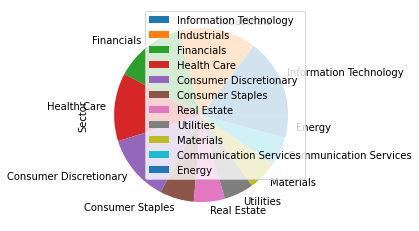

In [5]:
df.Sector.value_counts(normalize=True).plot(kind="pie", legend=True)

In [19]:
aapl_ticker = yf.Ticker("TSLA")

In [77]:
def compute_data(ticker_symbol, ref_date = '2021-01-01'):
    ticker = yf.Ticker(ticker_symbol)

    financials = ticker.financials.T
    financials.index = financials.index.year

    balance_sheet = ticker.balance_sheet.T
    balance_sheet.index = balance_sheet.index.year

    res = pd.merge(financials, balance_sheet, how='inner', left_index=True, right_index=True)

    end_date = datetime.strptime(ref_date, '%Y-%m-%d')

    start_date = end_date + timedelta(days=-180)

    hist = ticker.history(start=start_date, end=end_date)

    return hist


In [78]:
df = compute_data('AAPL')

In [79]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-06,91.609735,93.040827,91.577547,92.562973,118655600,0.0,0.0
2020-07-07,92.949228,93.744002,92.161881,92.275772,112424400,0.0,0.0
2020-07-08,93.273578,94.457077,93.184441,94.424889,117092000,0.0,0.0
2020-07-09,95.336026,95.390497,93.761333,94.830940,125642800,0.0,0.0
2020-07-10,94.417457,95.056254,93.793523,94.996826,90257200,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-24,130.515396,132.642284,130.296743,131.161407,54930100,0.0,0.0
2020-12-28,133.169039,136.498505,132.691969,135.852493,124486200,0.0,0.0
2020-12-29,137.204180,137.939636,133.516904,134.043655,121047300,0.0,0.0


In [62]:
date_ = datetime.strptime('2021-01-01', '%Y-%m-%d')
date_

datetime.datetime(2021, 1, 1, 0, 0)

In [43]:
df.head()

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Short Term Investments,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,
2021,21914000000.0,None,109207000000.0,None,94680000000.0,21973000000.0,152836000000.0,108949000000.0,108949000000.0,None,...,1.630000e+08,4.952700e+10,1.348360e+11,1.278770e+11,6.309000e+10,2.769900e+10,5.150600e+10,1.091060e+11,6.580000e+09,5.476300e+10
2020,18752000000.0,None,67091000000.0,None,57411000000.0,19916000000.0,104956000000.0,66288000000.0,66288000000.0,None,...,-4.060000e+08,4.533600e+10,1.437130e+11,1.008870e+11,6.533900e+10,5.292700e+10,3.744500e+10,9.866700e+10,4.061000e+09,4.229600e+10
2019,16217000000.0,None,65737000000.0,None,55256000000.0,18245000000.0,98392000000.0,63930000000.0,63930000000.0,None,...,-5.840000e+08,3.737800e+10,1.628190e+11,1.053410e+11,9.048800e+10,5.171300e+10,4.580400e+10,9.180700e+10,4.106000e+09,4.623600e+10
2018,14236000000.0,None,72903000000.0,None,59531000000.0,16705000000.0,101839000000.0,70898000000.0,70898000000.0,None,...,-3.454000e+09,4.130400e+10,1.313390e+11,1.707990e+11,1.071470e+11,4.038800e+10,4.899500e+10,9.373500e+10,3.956000e+09,5.588800e+10


In [32]:
ticker = yf.Ticker('AAPL')

In [53]:
ticker.quarterly_financials

,2021-09-25,2021-06-26,2021-03-27,2020-12-26
Research Development,5772000000.0,5717000000.0,5262000000.0,5163000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,23248000000.0,24369000000.0,28011000000.0,33579000000.0
Minority Interest,None,None,None,None
Net Income,20551000000.0,21744000000.0,23630000000.0,28755000000.0
Selling General Administrative,5616000000.0,5412000000.0,5314000000.0,5631000000.0
Gross Profit,35174000000.0,35255000000.0,38079000000.0,44328000000.0
Ebit,23786000000.0,24126000000.0,27503000000.0,33534000000.0
Operating Income,23786000000.0,24126000000.0,27503000000.0,33534000000.0
Other Operating Expenses,None,None,None,None


In [48]:
df_price = ticker.history(period='2y')

<AxesSubplot:xlabel='Date'>

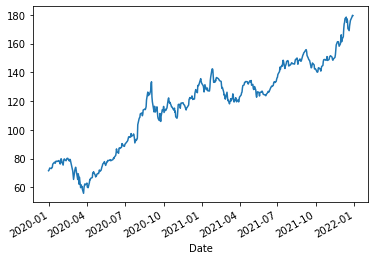

In [51]:
price = (df_price['Open'] + df_price['Close']) / 2

In [ ]:
## Example ##

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news